It took: 0.0020161072413126626 minutes to run


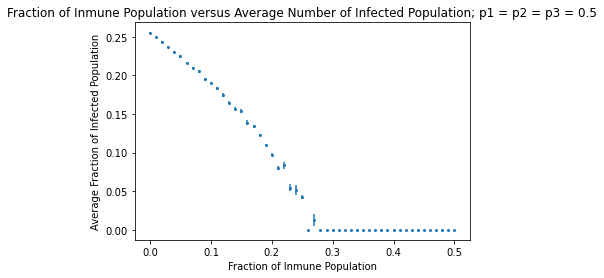

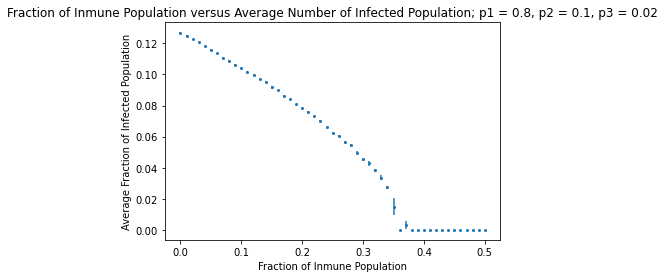

In [1]:
import matplotlib
import sys
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
import time
import scipy as sp
from scipy import ndimage

start_time=time.time()

N1=50
N2=100

F=np.linspace(0,0.5,num=51)

InPlot1=pd.read_csv('InmuneData1.csv')
InPlot2=pd.read_csv('InmuneData2.csv')


Ierror1= InPlot1.mean(axis=1)
IPlot1= Ierror1/(N1*N1)

Ierror2= InPlot2.mean(axis=1)
IPlot2= Ierror2/(N2*N2)


error1=np.zeros(len(F))
error2=np.zeros(len(F))


for i in range(len(F)):
        
        
        error1[i] = math.sqrt(np.average(InPlot1.loc[[i]]**2)-Ierror1[i]**2)/(math.sqrt(5)*(N1*N1))
        error2[i] = math.sqrt(np.average(InPlot2.loc[[i]]**2)-Ierror2[i]**2)/(math.sqrt(5)*(N2*N2))
  

combination1= np.vstack((F,IPlot1,error1)).T
PlotData1 = pd.DataFrame(combination1)
PlotData1.to_csv('InmunePlotData1.csv',index=False)

combination2= np.vstack((F,IPlot2,error2)).T
PlotData2 = pd.DataFrame(combination2)
PlotData2.to_csv('InmunePlotData2.csv',index=False)



plot1=plt.figure(1)
plt.errorbar(F,IPlot1,yerr=error1,ms=2,fmt="o")
plt.title("Fraction of Inmune Population versus Average Number of Infected Population; p1 = p2 = p3 = 0.5")
plt.xlabel("Fraction of Inmune Population");
plt.ylabel("Average Fraction of Infected Population");         
       
plot2=plt.figure(2) 
plt.errorbar(F,IPlot2,yerr=error2,ms=2,fmt="o")
plt.title("Fraction of Inmune Population versus Average Number of Infected Population; p1 = 0.8, p2 = 0.1, p3 = 0.02")
plt.xlabel("Fraction of Inmune Population");
plt.ylabel("Average Fraction of Infected Population");        


print("It took: "+str((time.time()-start_time)/60)+" minutes to run")